In [1]:
import json 
import pandas as pd 

In [2]:
test_state_file = "models/train_v1202/model_image-gpu2-large-zh-custom/trainer_state.json"

def load_loss_data(file):
    with open(file, 'r') as fin:

        alldata = "".join(fin.readlines())
        data = json.loads(alldata)
        data = data.get('log_history')

    data = [i for i in data if i.get('loss') is not None]
    return pd.DataFrame.from_dict(data)

sample_data = load_loss_data(test_state_file)
# len(sample_data), sample_data[:2]
sample_data

,epoch,grad_norm,learning_rate,loss,step
0,0.008,2.230712,0.000398,6.6702,10
1,0.016,1.510081,0.000397,5.6233,20
2,0.024,1.472887,0.000395,5.2921,30
3,0.032,1.575634,0.000394,5.0924,40
4,0.040,1.467831,0.000392,5.0049,50
...,...,...,...,...,...
245,1.968,0.822488,0.000006,3.1379,2460
246,1.976,0.801764,0.000005,3.1833,2470
247,1.984,0.812906,0.000003,3.4549,2480
248,1.992,0.847894,0.000002,3.2866,2490


In [3]:
train_model_type = ['base', 'custom', 'gather', 'gather_nn']

def load_loss_data_by_type(model_type):
    file = f"models/train_v1205/model_image-gpu2-large-zh-{model_type}/trainer_state.json"
    return load_loss_data(file)


all_data = {model_type: load_loss_data_by_type(model_type) for model_type in train_model_type}


In [4]:
concat_data_df = pd.concat([v.assign(**{
    'model_type':k
}) for k,v in all_data.items()])
concat_data_df

,epoch,grad_norm,learning_rate,loss,step,model_type
0,0.000965,3.515733,3.998070e-04,5.0386,10,base
1,0.001930,3.624786,3.996140e-04,3.3199,20,base
2,0.002895,2.970568,3.994210e-04,2.5440,30,base
3,0.003860,2.731416,3.992280e-04,2.2747,40,base
4,0.004825,3.262762,3.990350e-04,2.1032,50,base
...,...,...,...,...,...,...
2067,1.995561,0.691053,8.877738e-07,0.1652,20680,gather_nn
2068,1.996526,1.359571,6.947795e-07,0.1465,20690,gather_nn
2069,1.997491,1.769330,5.017852e-07,0.1537,20700,gather_nn
2070,1.998456,1.964171,3.087909e-07,0.1559,20710,gather_nn


In [5]:
concat_data_df[['loss', 'step', 'model_type']]

,loss,step,model_type
0,5.0386,10,base
1,3.3199,20,base
2,2.5440,30,base
3,2.2747,40,base
4,2.1032,50,base
...,...,...,...
2067,0.1652,20680,gather_nn
2068,0.1465,20690,gather_nn
2069,0.1537,20700,gather_nn
2070,0.1559,20710,gather_nn


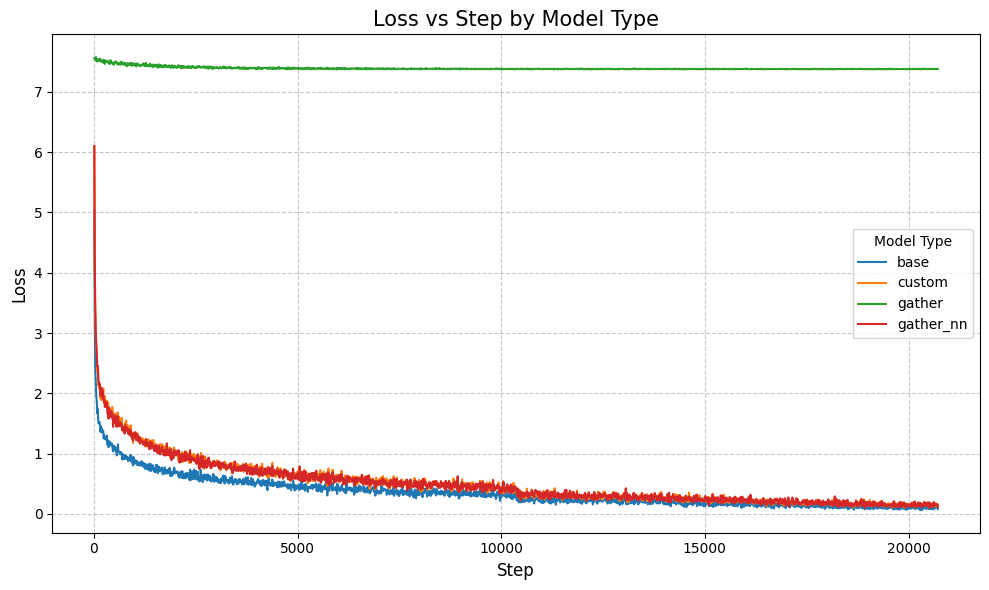

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# 设置图形样式
# plt.style.use('seaborn')
# plt.figure(figsize=(10, 6))

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10, 6))

# 按model_type进行分组并绘制
for name, group in concat_data_df.groupby('model_type'):
    ax.plot(group['step'], group['loss'], label=name)

ax.set_title('Loss vs Step by Model Type', fontsize=15)
ax.set_xlabel('Step', fontsize=12)
ax.set_ylabel('Loss', fontsize=12)
ax.legend(title='Model Type')
ax.grid(True, linestyle='--', alpha=0.7)

fig.tight_layout()
fig.savefig("loss_vs_step_by_model_type_big.png")

plt.show()